In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

In [2]:
df = pd.read_excel('data/노인대상요양기관종별급여비용현황.xlsx', sheet_name = None)

In [3]:
print(df.keys())
locals().update(df)

dict_keys(['a6569', 'a7074', 'a7579', 'a8084', 'a85'])


In [4]:
a6569.columns

Index(['요양기관종별(1)', '요양기관종별(2)', '진료구분별(1)', '청구건수', '내원일수 (일)', '요양일수 (일)',
       '원외처방횟수 (회)', '원외처방일수 (일)', '요양급여비용(계) (천원)', '요양급여비용(급여비) (천원)',
       '원외처방률 (%)', '원외처방횟수당 처방일수 (일)', '건당내원일수 (일)', '건당요양급여비용 (원)',
       '건당급여비 (원)', '내원일당요양급여비용 (원)', '요양일당요양급여비용 (원)'],
      dtype='object')

In [5]:
df.keys()

dict_keys(['a6569', 'a7074', 'a7579', 'a8084', 'a85'])

In [6]:
my_keys = ['a6569', 'a7074', 'a7579', 'a8084', 'a85']

In [7]:
my_columns = ['청구건수', '내원일수 (일)', '요양일수 (일)',
       '원외처방횟수 (회)', '원외처방일수 (일)', '요양급여비용(계) (천원)', '요양급여비용(급여비) (천원)',
       '원외처방률 (%)', '원외처방횟수당 처방일수 (일)', '건당내원일수 (일)', '건당요양급여비용 (원)',
       '건당급여비 (원)', '내원일당요양급여비용 (원)', '요양일당요양급여비용 (원)']

In [8]:
a6569 = a6569.replace("-", 0)

In [9]:
a7074 = a7074.replace("-", 0)

In [10]:
a7579 = a7579.replace("-", 0)

In [11]:
a8084 = a8084.replace("-", 0)

In [12]:
a85 = a85.replace("-", 0)

In [13]:
for i in my_columns:
    a6569[i] = a6569[i].astype(float, errors='ignore')

In [80]:
for i in my_columns:
    a7074[i] = a7074[i].astype(float, errors='ignore')

In [81]:
for i in my_columns:
    a7579[i] = a7579[i].astype(float, errors='ignore')

In [82]:
for i in my_columns:
    a8084[i] = a8084[i].astype(float, errors='ignore')

In [83]:
for i in my_columns:
    a85[i] = a85[i].astype(float, errors='ignore')

## 20년도 65세 이상 청구건수

In [18]:
#진료구분별에서 합계만 추출 

In [19]:
a6569 = a6569.groupby("진료구분별(1)").get_group("계")

In [20]:
a7074 = a7074.groupby("진료구분별(1)").get_group("계")

In [21]:
a7579 = a7579.groupby("진료구분별(1)").get_group("계")

In [22]:
a8084 = a8084.groupby("진료구분별(1)").get_group("계")

In [23]:
a85 = a85.groupby("진료구분별(1)").get_group("계")

In [24]:
#청구건수 순위 분류 

In [25]:
a = a6569.groupby(['요양기관종별(2)','진료구분별(1)'])[['청구건수']].sum().sort_values(by='요양기관종별(2)')

In [26]:
b = a7074.groupby(['요양기관종별(2)','진료구분별(1)'])[['청구건수']].sum().sort_values(by='요양기관종별(2)')

In [27]:
c = a7579.groupby(['요양기관종별(2)','진료구분별(1)'])[['청구건수']].sum().sort_values(by='요양기관종별(2)')

In [28]:
d = a8084.groupby(['요양기관종별(2)','진료구분별(1)'])[['청구건수']].sum().sort_values(by='요양기관종별(2)')

In [29]:
e = a85.groupby(['요양기관종별(2)','진료구분별(1)'])[['청구건수']].sum().sort_values(by='요양기관종별(2)')

In [30]:
f = a+b+c+d+e

In [89]:
고령인구의료보험청구건수 = f.sort_values('청구건수',ascending=False)
고령인구의료보험청구건수 = 고령인구의료보험청구건수.reset_index()
고령인구의료보험청구건수.set_index("요양기관종별(2)")
a=고령인구의료보험청구건수.drop(columns={'진료구분별(1)'})

In [93]:
a.to_csv("고령인구의료보험청구건수.csv",encoding='utf-8-sig')

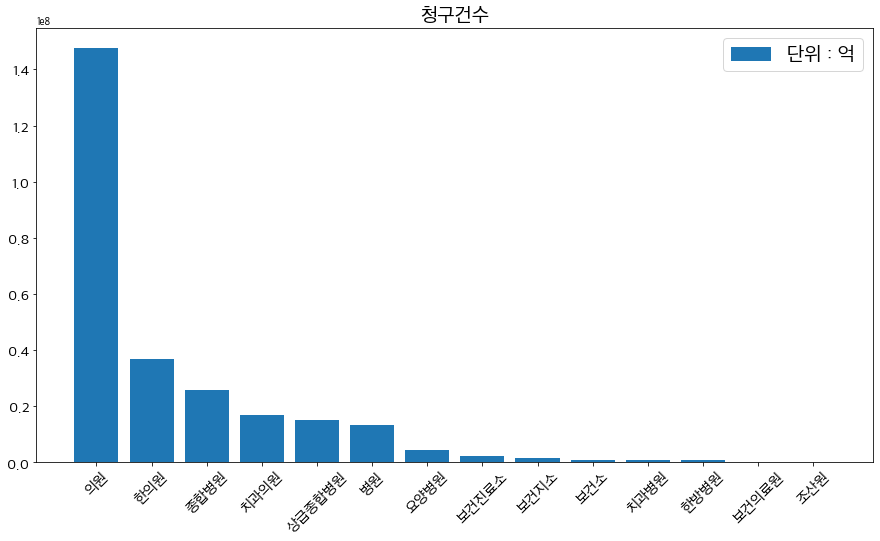

In [90]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(a['요양기관종별(2)'], a['청구건수'],label='단위 : 억',)
plt.grid(False)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("청구건수",size=20);
plt.legend(loc='best',fontsize=20)

## 20년도 65세 이상 요양급여비용 

In [33]:
q = a6569.groupby(['요양기관종별(2)','진료구분별(1)'])[['요양급여비용(계) (천원)']].sum().sort_values(by='요양기관종별(2)')

In [34]:
w = a7074.groupby(['요양기관종별(2)','진료구분별(1)'])[['요양급여비용(계) (천원)']].sum().sort_values(by='요양기관종별(2)')

In [35]:
e = a7579.groupby(['요양기관종별(2)','진료구분별(1)'])[['요양급여비용(계) (천원)']].sum().sort_values(by='요양기관종별(2)')

In [36]:
r = a8084.groupby(['요양기관종별(2)','진료구분별(1)'])[['요양급여비용(계) (천원)']].sum().sort_values(by='요양기관종별(2)')

In [37]:
t = a85.groupby(['요양기관종별(2)','진료구분별(1)'])[['요양급여비용(계) (천원)']].sum().sort_values(by='요양기관종별(2)')

In [38]:
#노인인구
노인요양급여비용 = (q+w+e+r+t).sort_values(by='요양급여비용(계) (천원)',ascending=False)

In [39]:
노인요양급여비용['요양급여비용(계) (천원)'].sum()

28843161852.0

In [40]:
(28843161852.0)*1000
#노인요양급여비용 : 28조

28843161852000.0

In [41]:
노인요양급여비용 = 노인요양급여비용.reset_index()
노인요양급여비용

,요양기관종별(2),진료구분별(1),요양급여비용(계) (천원)
0,종합병원,계,6.803015e+09
1,상급종합병원,계,6.109330e+09
2,요양병원,계,5.174420e+09
3,의원,계,4.980955e+09
4,병원,계,2.623789e+09
5,치과의원,계,1.953977e+09
6,한의원,계,8.703264e+08
7,한방병원,계,1.097662e+08
8,치과병원,계,1.066992e+08
9,보건지소,계,5.373809e+07


In [96]:
노인요양급여비용.to_csv("노인요양급여비용.csv",encoding='utf-8-sig')

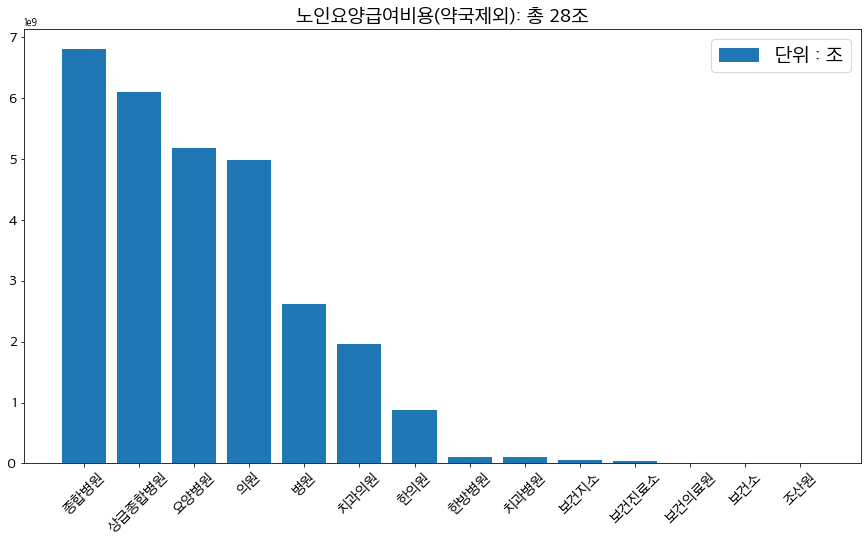

In [42]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(노인요양급여비용['요양기관종별(2)'], 노인요양급여비용['요양급여비용(계) (천원)'],label='단위 : 조',)
plt.grid(False)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("노인요양급여비용(약국제외): 총 28조",size=20);
plt.legend(loc='best',fontsize=20)

In [43]:
(5.174420e+09) * 1000
#요양병원 : 5조

#요양병원 17퍼 차지 

5174420000000.0

##  20년도 전체인구 요양급여비용

In [44]:
ef = pd.read_csv("data/요양기관종별 요양급여비용 심사실적.csv",encoding='euc-kr')

In [45]:
ef.head()

,요양기관종별(1),요양기관종별(2),진료구분별(1),청구건수 (건),내원일수 (일),요양일수 (일),원외처방횟수 (회),원외처방일수 (일),요양급여비용(계) (천원),요양급여비용(급여비) (천원),원외처방률 (%),원외처방횟수당 처방일수 (일),건당내원일수 (일),건당요양급여비용 (원),건당급여비 (원),내원일당요양급여비용 (원),요양일당요양급여비용 (원)
0,총계,소계,계,1276343311,1399063660,9566016842,-,-,86833855541,65387120553,-,-,1.1,68033,51230,62066,9077
1,의료기관,소계,계,836908155,959628504,1485819652,448817552,8113844444,69030049048,52469263703,-,-,1.15,82482,62694,71934,46459
2,의료기관,소계,입원,16125155,140210972,211806664,316352,4049731,32854812930,26676393779,-,-,8.7,2037488,1654334,234324,155117
3,의료기관,소계,외래,820783000,819417532,1274012988,448501200,8109794713,36175236119,25792869924,54.73,18.08,1,44074,31425,44148,28395
4,의료기관,상급종합병원,계,42447866,54634461,129324413,16384596,1175406304,15213991446,12088839255,-,71.74,1.29,358416,284793,278469,117642


In [46]:
ef.columns

Index(['요양기관종별(1)', '요양기관종별(2)', '진료구분별(1)', '청구건수 (건)', '내원일수 (일)',
       '요양일수 (일)', '원외처방횟수 (회)', '원외처방일수 (일)', '요양급여비용(계) (천원)',
       '요양급여비용(급여비) (천원)', '원외처방률 (%)', '원외처방횟수당 처방일수 (일)', '건당내원일수 (일)',
       '건당요양급여비용 (원)', '건당급여비 (원)', '내원일당요양급여비용 (원)', '요양일당요양급여비용 (원)'],
      dtype='object')

In [47]:
a = ['요양기관종별(1)', '요양기관종별(2)', '진료구분별(1)', '청구건수 (건)', '내원일수 (일)',
       '요양일수 (일)', '원외처방횟수 (회)', '원외처방일수 (일)', '요양급여비용(계) (천원)',
       '요양급여비용(급여비) (천원)', '원외처방률 (%)', '원외처방횟수당 처방일수 (일)', '건당내원일수 (일)',
       '건당요양급여비용 (원)', '건당급여비 (원)', '내원일당요양급여비용 (원)', '요양일당요양급여비용 (원)']

In [48]:
#컴마제거
for i in a:
    ef[i] = ef[i].str.replace(",", '')

In [49]:
#하이픈제거
ef.replace('-',0,inplace=True)

In [50]:
for i in a:
    ef[i] = ef[i].astype(float, errors='ignore')

In [51]:
ef = ef.groupby("진료구분별(1)").get_group("계")

In [52]:
#약국제거
ef = ef.groupby("요양기관종별(1)").get_group("의료기관")

In [53]:
ef = ef.sort_values("요양급여비용(계) (천원)", ascending=False)

In [54]:
ef.columns

Index(['요양기관종별(1)', '요양기관종별(2)', '진료구분별(1)', '청구건수 (건)', '내원일수 (일)',
       '요양일수 (일)', '원외처방횟수 (회)', '원외처방일수 (일)', '요양급여비용(계) (천원)',
       '요양급여비용(급여비) (천원)', '원외처방률 (%)', '원외처방횟수당 처방일수 (일)', '건당내원일수 (일)',
       '건당요양급여비용 (원)', '건당급여비 (원)', '내원일당요양급여비용 (원)', '요양일당요양급여비용 (원)'],
      dtype='object')

In [55]:
a = ['요양기관종별(2)','요양급여비용(계) (천원)']
ef = ef.loc[16:,a]
ef

,요양기관종별(2),요양급여비용(계) (천원)
16,의원,1.703419e+10
4,상급종합병원,1.521399e+10
7,종합병원,1.491337e+10
10,병원,7.753520e+09
13,요양병원,6.163374e+09
22,치과의원,4.554619e+09
43,한의원,2.465955e+09
40,한방병원,4.840019e+08
19,치과병원,3.064490e+08
34,보건지소,6.235880e+07


In [97]:
ef.to_csv("전체인구요양급여비용.csv",encoding='utf-8-sig')

In [56]:
(1.703419e+10) * 1000


17034190000000.0

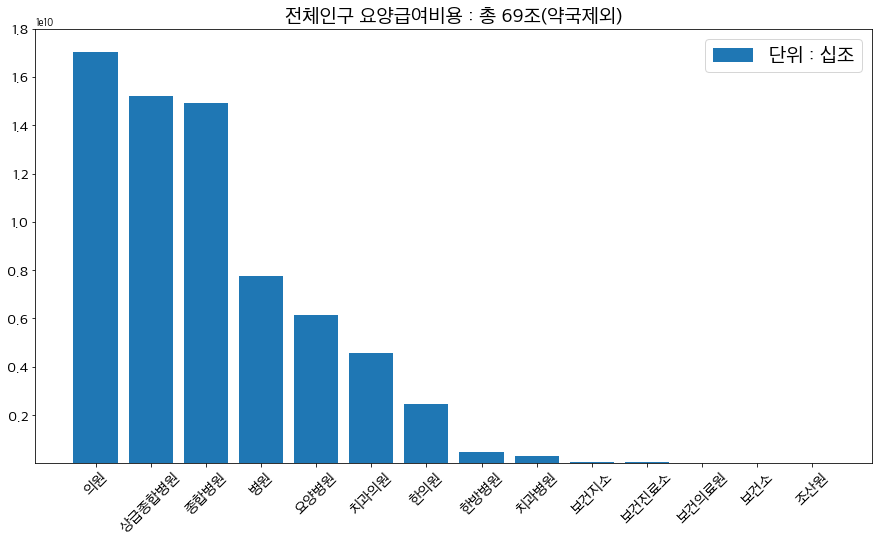

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ef['요양기관종별(2)'], ef['요양급여비용(계) (천원)'], label = "단위 : 십조")
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("전체인구 요양급여비용 : 총 69조(약국제외)",size=20,);
# plt.legend(loc='best',fontsize=20)
plt.ylim(100000,18000000000)
plt.legend(loc='best',fontsize=20)

In [58]:
#노인인구 (약국제외)
28843161852000

28843161852000

In [59]:
#2020년 기준 전체 건강보험 요양급여비용 (약국제외) (69조)에서 65세이상 인구 요양급여비용 (약국제외) (28조)의 비율 : 40%

## 65세 이상 요양급여비용 3년비교

In [60]:
sf = pd.read_csv("data/18년~20년 노인대상요양기관종별급여비용현황.csv",encoding='utf-8-sig')

In [61]:
sf.head()

,년도,2018전체,2018요양,2019전체,2019요양,2020전체,2020요양
0,65~69세,"5,825,839,713","332,600,612","6,585,033,320","344,824,410","7,070,647,100","362,624,069"
1,70~74세,"5,445,443,030","469,156,142","6,220,250,864","486,604,026","6,418,183,944","496,287,399"
2,75~79세,"5,753,780,394","957,334,387","6,275,483,809","945,292,937","6,207,848,960","919,247,412"
3,80~84세,"4,221,424,260","1,284,931,984","4,787,658,475","1,340,454,795","4,979,861,646","1,368,600,252"
4,85세~,"3,367,880,685","1,742,102,365","3,823,517,028","1,875,354,811","4,166,620,201","2,027,661,326"


In [62]:
sf.columns

Index(['년도', '2018전체', '2018요양', '2019전체', '2019요양', '2020전체', '2020요양'], dtype='object')

In [63]:
a = ['2018전체', '2018요양', '2019전체', '2019요양', '2020전체', '2020요양']

In [64]:
for i in a:
    sf[i] = sf[i].str.replace(',','')

In [65]:
sf.head()

,년도,2018전체,2018요양,2019전체,2019요양,2020전체,2020요양
0,65~69세,5825839713,332600612,6585033320,344824410,7070647100,362624069
1,70~74세,5445443030,469156142,6220250864,486604026,6418183944,496287399
2,75~79세,5753780394,957334387,6275483809,945292937,6207848960,919247412
3,80~84세,4221424260,1284931984,4787658475,1340454795,4979861646,1368600252
4,85세~,3367880685,1742102365,3823517028,1875354811,4166620201,2027661326


In [66]:
for i in a:
    sf[i] = sf[i].astype(int, errors='ignore')

In [67]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      5 non-null      object
 1   2018전체  5 non-null      int64 
 2   2018요양  5 non-null      int64 
 3   2019전체  5 non-null      int64 
 4   2019요양  5 non-null      int64 
 5   2020전체  5 non-null      int64 
 6   2020요양  5 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 408.0+ bytes


In [68]:
sf.insert(3, '2018요양비율', (sf['2018요양']/sf['2018전체'])*100)

In [69]:
sf.insert(6, '2019요양비율', (sf['2019요양']/sf['2019전체'])*100)

In [70]:
sf.insert(9, '2020요양비율', (sf['2020요양']/sf['2020전체'])*100)

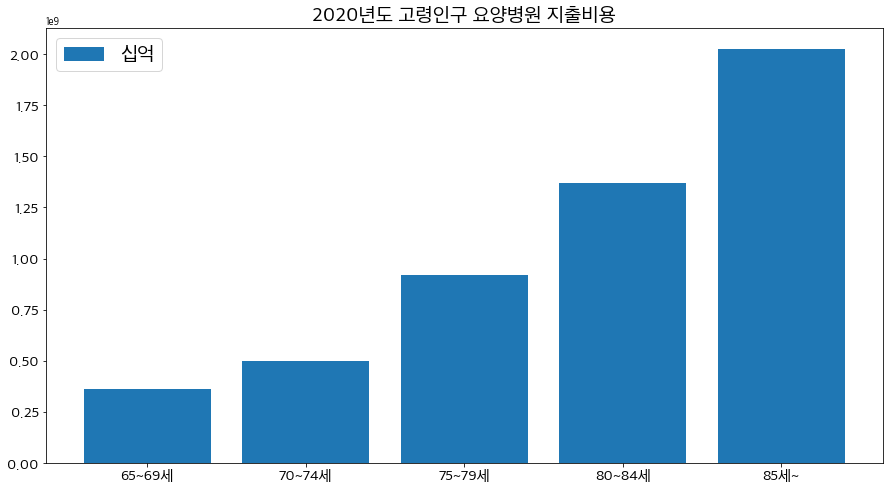

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(sf['년도'], sf['2020요양'],label='십억')
plt.xticks(rotation=0,size=15)
plt.yticks(size=15)
plt.title("2020년도 고령인구 요양병원 지출비용",size=20);
plt.legend(loc='best',fontsize=20)

No handles with labels found to put in legend.


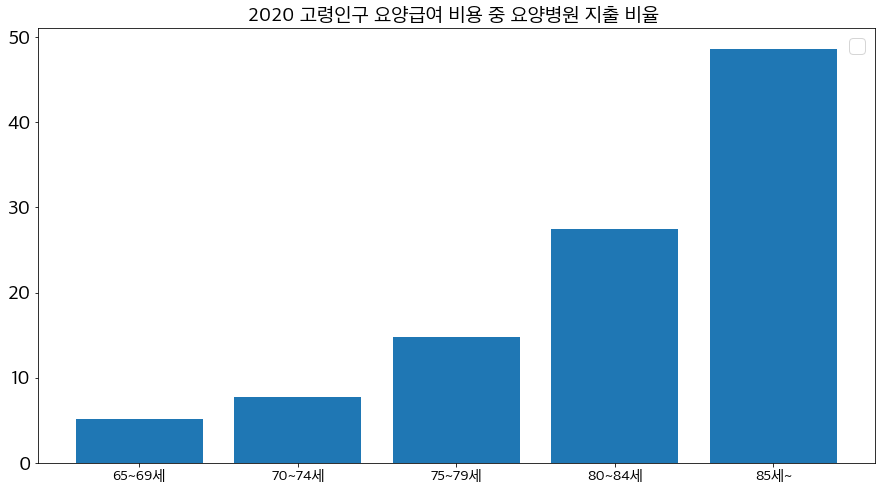

In [72]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(sf['년도'], sf['2020요양비율'])
plt.xticks(rotation=0,size=15)
plt.yticks(size=20)
plt.title("2020 고령인구 요양급여 비용 중 요양병원 지출 비율 ",size=20);
plt.legend(loc='best',fontsize=20)

In [73]:
print((sf['2018전체']).sum())
print((sf['2019전체']).sum())
print((sf['2020전체']).sum())

24614368082
27691943496
28843161851


In [74]:
ff = pd.DataFrame([['2018년', '24614368082'],
                   ['2019년', '27691943496'],
                   ['2020년', '28843161851']],columns=['년도','금액'])
ff

,년도,금액
0,2018년,24614368082
1,2019년,27691943496
2,2020년,28843161851


In [75]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      3 non-null      object
 1   금액      3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [76]:
ff['금액'] = ff['금액'].astype(int)

In [77]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      3 non-null      object
 1   금액      3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


Text(0.5, 1.0, '2018~2020 노인인구 요양병원 지출 금액, 17퍼 증가')

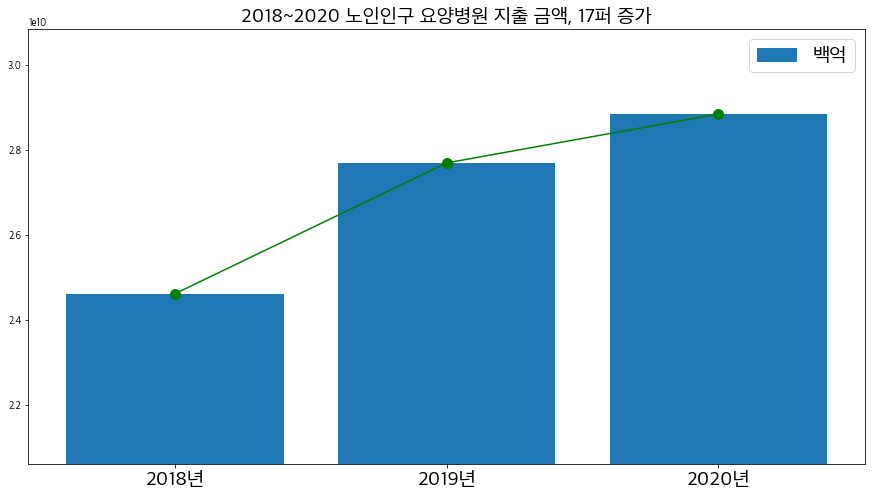

In [78]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ff['년도'],ff['금액'],label='백억')
plt.ylim(20614368082, 30843161851)
plt.plot(ff['년도'],ff['금액'],marker='o',color='green',markersize=10)
plt.xticks(size=20)
plt.legend(loc = 'best',fontsize=20)
plt.title('2018~2020 노인인구 요양병원 지출 금액, 17퍼 증가',size=20)

In [101]:
ff.to_csv("2018~2019 노인인구 요양병원 지출금액 17퍼증가.csv",encoding='utf-8-sig')